In [1]:
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
import cv2 as cv
import torch 

In [3]:
img_path = './test_imgs/great_cat.jpg'
img_cat = cv.imread(img_path)
img_cat = cv.cvtColor(img_cat, cv.COLOR_BGR2RGB)

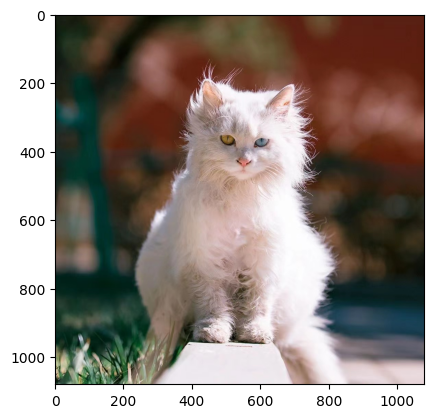

In [4]:
plt.imshow(img_cat)

In [8]:
# 定义辅助函数
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   



In [5]:
# 模型权重文件
sam_checkpoint = "./weights/sam_vit_h_4b8939.pth"
# 模型类型
model_type = "vit_h"
# 使用GPU
device = "cuda"
# 加载模型
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# 将模型放到GPU上
sam.to(device=device)
# 创建预测器
predictor = SamPredictor(sam)

In [6]:
# 使用`SamPredictor.set_image`生成embedding。 `SamPredictor`将记住这个值，并将其用于后续的掩膜预测。
predictor.set_image(img_cat)

In [25]:
# 选择一个点 (x, y) 作为输入
input_point = np.array([[500, 600], [200, 200]])
# 标注这个点的类别，1 表示foreground，即前景点，0 表示background，即背景点
input_label = np.array([1, 0])

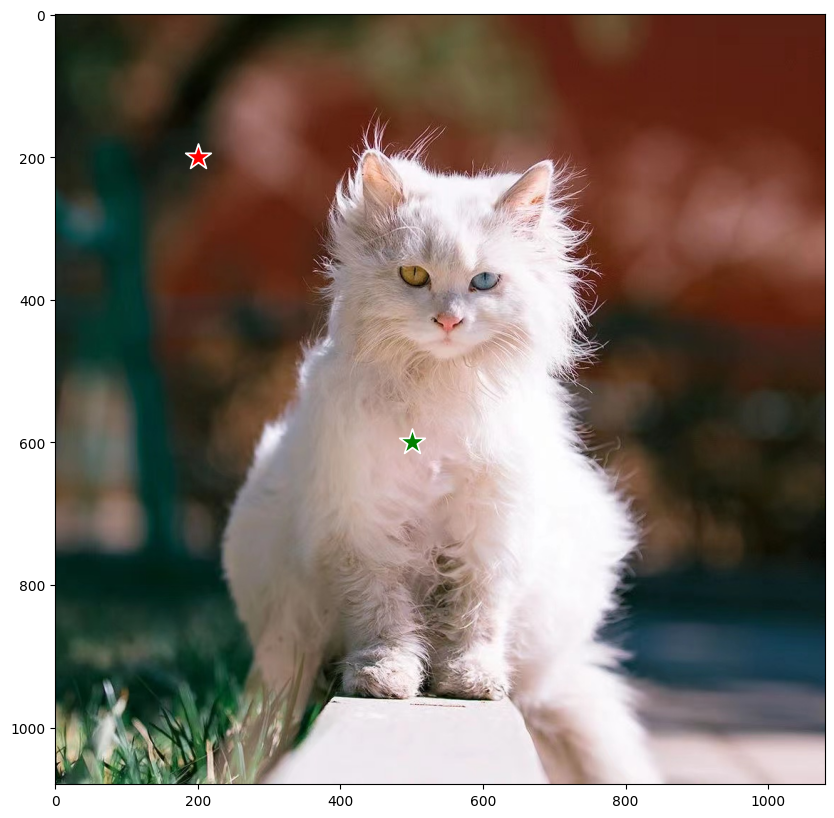

In [26]:
# 绘制检查一下
plt.figure(figsize=(10,10))
plt.imshow(img_cat)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [27]:
# 使用预训练模型进行预测，参数：点坐标，点标签，是否输出多分支mask，输出：多分支mask，分数，logits
# 当multimask_output=True时，输出3个分支的mask，为False时，输出1个分支的mask。未解决prompt提示模糊问题，建议使用True，然后通过scores进行筛选
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [28]:
#  (number_of_masks) x H x W
masks.shape

(3, 1080, 1080)

In [29]:
# masks[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

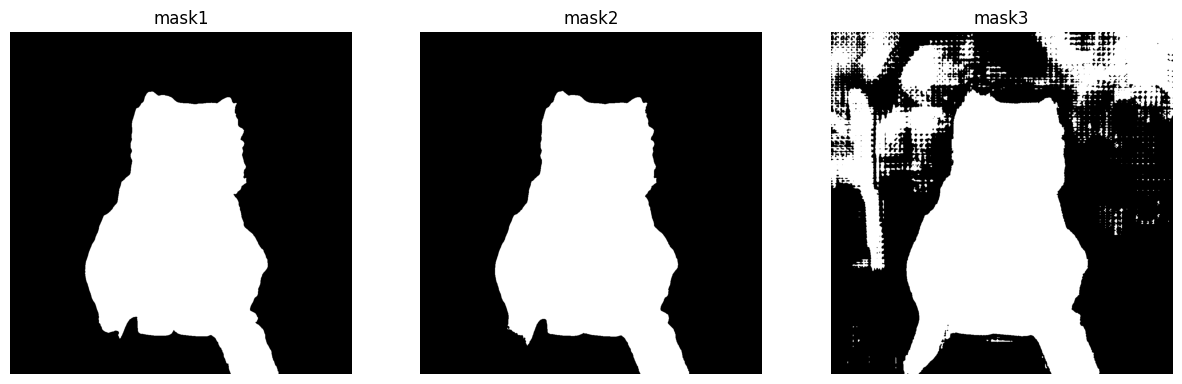

In [30]:
# 分别显示三个mask
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(masks[i], cmap='gray')
    plt.axis('off')
    plt.title('mask'+str(i+1))
plt.show()

In [31]:
# 三个mask的预测分数
scores

array([0.99443096, 1.000348  , 0.9452921 ], dtype=float32)

In [32]:
# logit是没有经过softmax之前的值
logits.shape 

(3, 256, 256)

In [34]:
# logits

In [46]:
img_cat_copy = img_cat.copy()
mask = masks[1]
mask = mask.astype(np.uint8) * 255
img_cat_copy[mask == 0] = 255

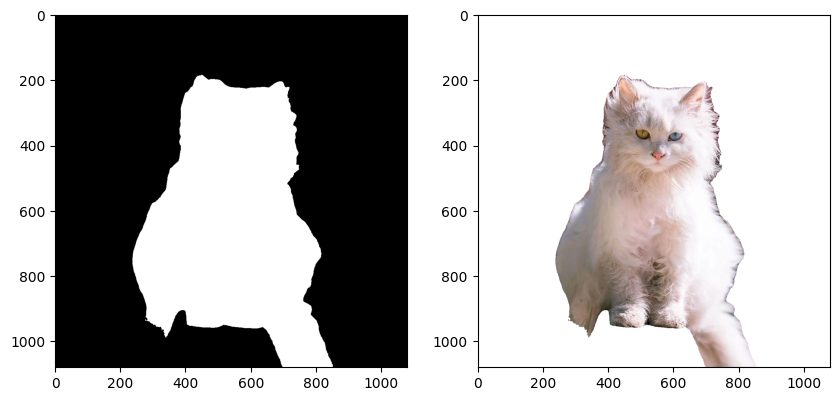

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(masks[1], cmap='gray')
plt.subplot(122)
plt.imshow(img_cat_copy)

In [17]:
# 选择一个点 (x, y) 作为输入
input_point = np.array([[500, 600], [100, 200]])
# 标注这个点的类别，1 表示foreground，即前景点，0 表示background，即背景点
input_label = np.array([1, 0])

In [18]:
print(input_point)
print(input_label)

[[500 600]
 [100 200]]
[1 0]


In [23]:
input_point[input_label==1]

array([[500, 600]])